In [ ]:
#Pre processing of data before PCA analysis: 
#input file is with columns name as ID and row names as gene ID. the genes with expression less than 10 are removed. NA removed and aggregated

#load Data
data <- read.table("/content/GSE178967_genecol_NArem_Aggregated_nzv_round.txt", sep="\t", header=TRUE, row.names=1, check.names=F)

In [ ]:
#create GSE178967_severe_COUNT_GENESYM_Aggregate_NArem_Zrem_round_deseq2input.txt
which(colnames(data) %in% c("L_001_00", "L_142_00", "L_148_00", "L_150_00", "L_313_00", "L_318_00", "L_344_00"))

[1]   6  22  86  94  95 124 161

In [ ]:
which(colnames(data) %in% c("L_006_00", "L_118_00", "L_174_00", "L_301_00", "L_303_00", "L_311_00", "L_325_00", "L_329_00"))

[1]   9  18  70  74  97 115 174 175

In [ ]:
GSE178967_pca<- data[,c(95, 94, 22, 6, 161, 86, 124, 174, 97, 74, 18, 175, 115, 70, 9 )]

In [ ]:
#Check dimensions of data
dim(GSE178967_pca)

[1] 35587    15

In [ ]:
#Create dataframe for the table
data_t <- as.data.frame(t(GSE178967_pca))

In [ ]:
#log transformation. 
data_log <- log(data_t+1)
#+1 so as to handle zero values

In [ ]:
#Write results into a file (why)
write.table(data_log,file="/content/GSE159787_data_logtransformed.txt", sep='\t',  quote = F,row.names = TRUE)

In [ ]:
dim(data_log)

[1]    15 35587

In [ ]:
#install caret package
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
#load library
library("caret")

Loading required package: ggplot2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


applying nzv again as 

Warning message in preProcess.default(data_log, method = c("center", "scale")):
“These variables have zero variances: AADACP1, ABBA01000935.2, ABCB10P4, ABHD17AP8, AC000095.2, AC000111.1, AC000111.2, AC000362.1, AC002076.2, AC002127.1, AC002310.4, AC002456.2, AC002486.1, AC002519.2, AC002524.1, AC002545.1, AC003002.1, AC003045.1, AC003070.7, AC003071.1, AC003958.1, AC004004.1, AC004006.1, AC004062.1, AC004066.1, AC004080.3, AC004129.1, AC004232.1, AC004386.2, AC004522.1, AC004690.1, AC004852.1, AC004852.3, AC004853.1, AC004866.1, AC004866.2, AC004890.1, AC004893.2, AC004923.3, AC004986.1, AC005000.1, AC005000.2, AC005002.1, AC005002.2, AC005011.1, AC005019.1, AC005034.1, AC005040.1, AC005042.3, AC005094.1, AC005176.2, AC005178.1, AC005185.1, AC005191.1, AC005229.1, AC005229.3, AC005255.1, AC005297.2, AC005297.3, AC005345.1, AC005520.4, AC005551.1, AC005562.2, AC005771.1, AC005829.1, AC005838.1, AC005868.1, AC005906.1, AC005951.1, AC006006.1, AC006022.1, AC006065.2, AC006115.1, AC006130.2, AC006133.1, AC006158.1, AC006158.2, AC006158.3, AC006160.2, AC006210.1, AC006328.1, AC006328.2, AC006329.2, AC006338.1, AC006338.2, AC006366.1, AC006380.1, AC006386.1, AC006386.2, AC006441.5, AC006445.1, AC006455.6, AC006455.7, AC006457.1, AC006463.1, AC006499.8, AC006504.6, AC006518.7, AC006539.3, AC006548.2, AC006557.2, AC006600.1, AC006967.1, AC006970.1, AC006986.1, AC006987.1, AC006989.1, AC007064.1, AC007064.3, AC007115.1, AC007216.5, AC007237.1, AC007274.3, AC007275.1, AC007322.1, AC007322.3, AC007322.4, AC007326.1, AC007326.3, AC007363.1, AC007383.1, AC007387.1, AC007389.2, AC007389.4, AC007448.1, AC007536.1, AC007547.1, AC007547.2, AC007547.3, AC007559.1, AC007560.1, AC007562.1, AC007563.3, AC007620.1, AC007621.1, AC007685.1, AC007718.1, AC007742.1, AC007751.1, AC007849.2, AC007881.1, AC007908.1, AC007923.3, AC007967.1, AC007967.3, AC007967.4, AC007991.1, AC008011.1, AC008026.2, AC008126.1, AC008127.2, AC008162.1, AC008162.2, AC008171.1, AC008175.2, AC008267.1, AC008410.1, AC008413.1, AC008432.1, AC008446.1, AC008481.3, AC008489.1, AC008496.1, AC008521.2, AC008562.1, AC008571.1, AC008620.1, AC008622.3, AC008677.2, AC008677.3, AC008687.5, AC008687.7, AC008687.8, AC008694.1, AC008696.1, AC008723.1, AC008725.1, AC008737.2, AC008740.2, AC008749.1, AC008782.1, AC008798.1, AC008825.2, AC008834.1, AC008837.1, AC008878.2, AC008967.1, AC009053.4, AC009060.2, AC009088.4, AC009101.1, AC009132.1, AC009161.1, AC009163.2, AC009169.1, AC009171.1, AC009233.1, AC009237.11, AC009237.12, AC009237.13, AC009237.2, AC009237.4, AC009237.6, AC009237.7, AC009238.1, AC009238.3, AC009310.1, AC009414.1, AC009502.2, AC009517.1, AC009518.3, AC009567.2, AC009643.2, AC009646.1, AC009712.1, AC009804.1, AC009879.2, AC009901.2, AC009902.1, AC009945.1, AC009947.1, AC009947.2, AC009963.3, AC009965.2, AC009969.1, AC009997.1, AC010086.2, AC010095.1, AC010099.1, AC010099.2, AC010099.3, AC010132.2, AC010133.1, AC010141.1, AC010153.1, AC010154.1, AC010200.2, AC010306.1, AC010327.1, AC010330.1, AC010336.7, AC010343.2, AC010350.1, AC010374.2, AC010376.1, AC010385.1, AC010385.2, AC010385.3, AC010460.1, AC010460.2, AC010463.1, AC010468.3, AC010469.2, AC010476.1, AC010487.4, AC010493.1, AC010503.3, AC010531.2, AC010620.2, AC010631.1, AC010677.1, AC010678.1, AC010740.1, AC010881.1, AC010928.1, AC010928.2, AC010931.1, AC010975.3, AC010997.1, AC011005.2, AC011037.1, AC011195.1, AC011233.1, AC011270.1, AC011298.2, AC011298.3, AC011416.2, AC011447.4, AC011453.2, AC011455.2, AC011467.2, AC011467.5, AC011471.1, AC011487.3, AC011487.4, AC011500.1, AC011602.1, AC011603.4, AC011604.1, AC011604.2, AC011611.1, AC011626.1, AC011753.1, AC011753.3, AC011853.1, AC011890.1, AC011890.2, AC011894.1, AC011921.2, AC011979.2, AC011998.1, AC011998.2, AC012005.1, AC012005.2, AC012044.1, AC012065.5, AC012100.1, AC012146.4, AC012175.1, AC012306.1, AC012308.1, AC012314.22, AC012354.2, AC012400.1, AC012414.2, AC012414.7, AC012493.1, AC012493.3, AC012498.1, AC012498.2, AC013244.3, AC013262.1, AC013268.2, AC013356.1, AC013410.1, AC013410.2, AC013412.1, AC013429.1, AC013467.1, AC013562.2, AC013565.2, AC013643.1, AC013701.1, AC013734.1, AC013828.1, AC015688.1, AC015712.3, AC015720.1, AC015818.1, AC015818.7, AC015922.1, AC015983.1, AC016027.4, AC016256.1, AC016292.2, AC016304.1, AC016546.1, AC016596.2, AC016632.1, AC016694.1, AC016696.1, AC016727.2, AC016769.4, AC016831.2, AC016885.3, AC016907.1, AC016909.1, AC016911.1, AC016925.1, AC016925.2, AC016991.1, AC017007.1, AC017007.4, AC017013.1, AC017019.1, AC017037.1, AC017081.1, AC018448.1, AC018554.2, AC018558.4, AC018639.1, AC018645.1, AC018659.1, AC018688.1, AC018695.5, AC018710.1, AC018717.1, AC018738.1, AC018845.2, AC018846.1, AC018861.1, AC018892.1, AC019129.1, AC019159.1, AC019176.1, AC019176.2, AC019178.1, AC019178.2, AC019185.3, AC019235.1, AC019322.2, AC019322.3, AC020611.1, AC020612.2, AC020699.1, AC020891.4, AC020907.6, AC020914.2, AC020914.5, AC020983.1, AC021006.1, AC021016.1, AC021066.3, AC021074.2, AC021146.1, AC021146.11, AC021146.2, AC021146.3, AC021146.4, AC021146.5, AC021146.6, AC021146.9, AC021193.1, AC021205.2, AC021242.1, AC021506.2, AC021678.3, AC021733.2, AC021753.1, AC022028.1, AC022145.2, AC022146.1, AC022206.1, AC022254.1, AC022335.1, AC022360.1, AC022441.3, AC022483.1, AC022494.1, AC022523.2, AC022616.1, AC022616.2, AC022616.3, AC022616.4, AC022616.6, AC022655.2, AC022695.1, AC022709.1, AC022748.1, AC022748.3, AC022795.1, AC022832.1, AC022878.1, AC022880.1, AC022880.2, AC022882.1, AC023043.2, AC023043.3, AC023078.2, AC023078.6, AC023141.11, AC023141.13, AC023157.2, AC023194.1, AC023245.1, AC023274.2, AC023310.2, AC023442.1, AC023449.1, AC023491.2, AC023512.1, AC023538.1, AC023575.1, AC023632.4, AC023790.1, AC023827.1, AC023906.1, AC023932.1, AC024082.2, AC024085.1, AC024153.1, AC024255.1, AC024257.2, AC024288.1, AC024581.2, AC024589.2, AC024614.3, AC024995.1, AC025161.1, AC025165.3, AC025252.2, AC025271.1, AC025278.3, AC025279.3, AC025458.1, AC025459.1, AC025518.1, AC025554.1, AC025588.2, AC025627.2, AC025750.1, AC025768.1, AC025946.2, AC026185.1, AC026316.1, AC026320.2, AC026333.1, AC026336.1, AC026355.3, AC026371.1, AC026396.1, AC026410.1, AC026410.2, AC026421.1, AC026461.4, AC026468.1, AC026470.2, AC026740.2, AC026785.1, AC026798.1, AC026898.1, AC026951.2, AC027124.1, AC027124.2, AC027176.1, AC027216.1, AC027229.1, AC027250.1, AC027308.1, AC027334.1, AC027345.1, AC027369.2, AC027369.4, AC027369.5, AC027506.1, AC027612.4, AC027673.1, AC027801.2, AC034102.2, AC034105.4, AC034114.1, AC034198.1, AC034205.1, AC034244.1, AC034268.1, AC036111.3, AC036164.1, AC041039.1, AC044792.1, AC044810.1, AC044836.1, AC044860.2, AC044860.3, AC048334.1, AC048344.3, AC048382.3, AC051619.2, AC053481.1, AC053481.3, AC053503.3, AC055731.1, AC055872.1, AC055876.2, AC055876.3, AC055876.5, AC060766.3, AC060814.1, AC061965.1, AC061975.2, AC061975.3, AC062016.1, AC062022.1, AC063952.3, AC063976.3, AC064862.2, AC067819.1, AC067904.3, AC067942.3, AC068134.4, AC068135.1, AC068137.1, AC068137.3, AC068137.4, AC068228.2, AC068338.1, AC068446.3, AC068533.1, AC068533.2, AC068587.1, AC068587.3, AC068587.5, AC068587.6, AC068631.3, AC068714.1, AC068781.1, AC068802.1, AC068831.2, AC068867.1, AC069113.1, AC069113.3, AC069218.1, AC069277.2, AC069285.2, AC069439.1, AC069454.1, AC069545.1, AC072026.1, AC072046.2, AC073072.2, AC073091.1, AC073091.2, AC073114.1, AC073135.1, AC073136.2, AC073188.1, AC073264.1, AC073349.3, AC073465.1, AC073522.1, AC073539.2, AC073539.7, AC073581.1, AC073610.2, AC073648.1, AC073648.2, AC073648.4, AC073648.5, AC073648.6, AC073869.6, AC073869.8, AC073873.1, AC073901.1, AC073910.1, AC073941.2, AC074029.1, AC074029.2, AC074050.1, AC074051.2, AC074051.3, AC074052.1, AC074085.1, AC074101.1, AC074121.1, AC074198.2, AC074250.1, AC074255.1, AC074290.1, AC074344.1, AC078809.1, AC078817.1, AC078878.1, AC078899.3, AC078899.4, AC078899.5, AC078918.1, AC078974.1, AC078991.1, AC079064.1, AC079080.1, AC079150.1, AC079168.1, AC079168.2, AC079178.2, AC079238.1, AC079354.1, AC079355.1, AC079395.3, AC079598.2, AC079598.3, AC079598.4, AC079600.1, AC079776.2, AC079804.2, AC079834.1, AC079841.1, AC079953.1, AC079987.1, AC080112.2, AC082651.2, AC083795.1, AC083800.1, AC083806.1, AC083849.1, AC083906.2, AC083906.4, AC083906.5, AC083977.1, AC084033.2, AC084121.10,”

In [ ]:
# remove near zero variation for the columns at least or 80% of the values are the same
# this function creates the filter 
#nzv <- preProcess(data_log,method="nzv",uniqueCut = 20)

In [ ]:
# apply the above created filter using "predict" function
#nzv_data <- predict(nzv,data_t)

In [ ]:
#Check dimensions of data
dim(data_log)

[1]    15 35587

In [ ]:
#Check dimensions of data
dim(data_log)
#dimensions of data_log and nzv_data are same. how?

[1]    15 35587

In [ ]:
# center & scaling
processCenter <- preProcess(data_log, method = c("center", "scale"))

Warning message in preProcess.default(data_log, method = c("center", "scale")):
“These variables have zero variances: AADACP1, ABBA01000935.2, ABCB10P4, ABHD17AP8, AC000095.2, AC000111.1, AC000111.2, AC000362.1, AC002076.2, AC002127.1, AC002310.4, AC002456.2, AC002486.1, AC002519.2, AC002524.1, AC002545.1, AC003002.1, AC003045.1, AC003070.7, AC003071.1, AC003958.1, AC004004.1, AC004006.1, AC004062.1, AC004066.1, AC004080.3, AC004129.1, AC004232.1, AC004386.2, AC004522.1, AC004690.1, AC004852.1, AC004852.3, AC004853.1, AC004866.1, AC004866.2, AC004890.1, AC004893.2, AC004923.3, AC004986.1, AC005000.1, AC005000.2, AC005002.1, AC005002.2, AC005011.1, AC005019.1, AC005034.1, AC005040.1, AC005042.3, AC005094.1, AC005176.2, AC005178.1, AC005185.1, AC005191.1, AC005229.1, AC005229.3, AC005255.1, AC005297.2, AC005297.3, AC005345.1, AC005520.4, AC005551.1, AC005562.2, AC005771.1, AC005829.1, AC005838.1, AC005868.1, AC005906.1, AC005951.1, AC006006.1, AC006022.1, AC006065.2, AC006115.1, AC006130

In [ ]:
# apply center & scaling
data_norm <- predict(processCenter,data_log)

In [ ]:
head(data_norm)

,A1BG,A1CF,A2M,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,⋯,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZYXP1,ZZEF1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
L_001_00,1.2817081,1.1897858,-0.1398060,1.0275417,0.1508451,1.3139305,0.2204786,0.6440795,1.1009778,1.3024427,⋯,0.4650147,0.8517783,1.3402118,1.2113456,1.7296454,-0.2581989,1.0073419,0.5383869,-0.2581989,0.90292793
L_142_00,0.8544099,0.4066888,0.5732102,0.8858045,0.5817157,1.3139305,0.5314305,-0.5040072,0.9424396,0.9708195,⋯,-0.2488086,0.5598294,0.5897022,0.6979140,0.9120788,-0.2581989,0.7993136,0.5669839,-0.2581989,0.62543910
L_148_00,0.8544099,0.8376582,0.5996457,0.7291212,0.5578348,0.4922507,0.7943365,-0.5040072,0.9424396,0.9008037,⋯,0.1531959,0.4640270,0.4905015,0.8598388,0.7376400,-0.2581989,0.8269736,0.9835567,-0.2581989,1.01409420
L_150_00,0.9116723,0.8376582,1.6403285,1.0275417,1.6502412,-1.1850025,0.7943365,-0.5040072,0.7671838,1.1909516,⋯,0.1531959,1.0079499,0.7611447,0.7936136,0.9120788,-0.2581989,0.7913149,-0.3186105,-0.2581989,1.10792145
L_313_00,-0.2171864,-0.9320244,1.1193872,-0.1449855,0.8874233,0.4922507,-0.6507412,0.6440795,0.9424396,-0.3680195,⋯,0.1531959,0.9027308,0.6740293,0.2408848,-0.4445244,-0.2581989,0.1486039,0.1988941,-0.2581989,-0.06449506
L_318_00,-1.4953723,-0.9320244,-1.0052406,-1.5076158,-0.5171507,-1.1850025,-0.6507412,-0.5040072,-1.7346861,-1.4083461,⋯,-1.7839998,-1.4864403,-1.7647602,-1.5186310,-1.5316093,-0.2581989,-1.5664077,-1.0368523,-0.2581989,-1.72641285


In [ ]:
#round up value upto 3 digits
data_norm_round <- round(data_norm,2)

In [ ]:
head(data_norm_round)

,A1BG,A1CF,A2M,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,⋯,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZYXP1,ZZEF1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
L_001_00,1.28,1.19,-0.14,1.03,0.15,1.31,0.22,0.64,1.10,1.30,⋯,0.47,0.85,1.34,1.21,1.73,-0.26,1.01,0.54,-0.26,0.90
L_142_00,0.85,0.41,0.57,0.89,0.58,1.31,0.53,-0.50,0.94,0.97,⋯,-0.25,0.56,0.59,0.70,0.91,-0.26,0.80,0.57,-0.26,0.63
L_148_00,0.85,0.84,0.60,0.73,0.56,0.49,0.79,-0.50,0.94,0.90,⋯,0.15,0.46,0.49,0.86,0.74,-0.26,0.83,0.98,-0.26,1.01
L_150_00,0.91,0.84,1.64,1.03,1.65,-1.19,0.79,-0.50,0.77,1.19,⋯,0.15,1.01,0.76,0.79,0.91,-0.26,0.79,-0.32,-0.26,1.11
L_313_00,-0.22,-0.93,1.12,-0.14,0.89,0.49,-0.65,0.64,0.94,-0.37,⋯,0.15,0.90,0.67,0.24,-0.44,-0.26,0.15,0.20,-0.26,-0.06
L_318_00,-1.50,-0.93,-1.01,-1.51,-0.52,-1.19,-0.65,-0.50,-1.73,-1.41,⋯,-1.78,-1.49,-1.76,-1.52,-1.53,-0.26,-1.57,-1.04,-0.26,-1.73


In [ ]:
#Write results into a file
write.table(data_norm_round,file="data_normalized_rounded.txt", sep='\t',  quote = F,row.names = TRUE)

pca

In [ ]:
#load Data
OBJECT <- read.table("/content/PCA_input.txt",  sep = "\t", header=TRUE, row.names = 1)

In [ ]:
head(OBJECT)
tail(OBJECT)
dim(OBJECT)

,Severity,A1BG,A1CF,A2M,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,AAAS,⋯,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZYXP1,ZZEF1
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
L_001_00,Asymptomatic,1.28,1.19,-0.14,1.03,0.15,1.31,0.22,0.64,1.10,⋯,0.47,0.85,1.34,1.21,1.73,-0.26,1.01,0.54,-0.26,0.90
L_142_00,Asymptomatic,0.85,0.41,0.57,0.89,0.58,1.31,0.53,-0.50,0.94,⋯,-0.25,0.56,0.59,0.70,0.91,-0.26,0.80,0.57,-0.26,0.63
L_148_00,Asymptomatic,0.85,0.84,0.60,0.73,0.56,0.49,0.79,-0.50,0.94,⋯,0.15,0.46,0.49,0.86,0.74,-0.26,0.83,0.98,-0.26,1.01
L_150_00,Asymptomatic,0.91,0.84,1.64,1.03,1.65,-1.19,0.79,-0.50,0.77,⋯,0.15,1.01,0.76,0.79,0.91,-0.26,0.79,-0.32,-0.26,1.11
L_313_00,Asymptomatic,-0.22,-0.93,1.12,-0.14,0.89,0.49,-0.65,0.64,0.94,⋯,0.15,0.90,0.67,0.24,-0.44,-0.26,0.15,0.20,-0.26,-0.06
L_318_00,Asymptomatic,-1.50,-0.93,-1.01,-1.51,-0.52,-1.19,-0.65,-0.50,-1.73,⋯,-1.78,-1.49,-1.76,-1.52,-1.53,-0.26,-1.57,-1.04,-0.26,-1.73


,Severity,A1BG,A1CF,A2M,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,AAAS,⋯,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZYXP1,ZZEF1
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
L_174_00,Severe,1.48,2.36,1.02,1.49,0.65,1.31,1.71,2.94,0.35,⋯,1.29,0.84,0.83,1.23,1.28,3.61,1.33,0.58,3.61,1.10
L_301_00,Severe,-1.65,-0.93,-0.51,-1.51,-0.45,-1.19,-0.65,-0.50,-1.73,⋯,-1.78,-1.24,-1.50,-1.81,-1.18,-0.26,-1.80,-2.28,-0.26,-1.57
L_303_00,Severe,0.41,0.41,1.00,0.55,0.87,-0.04,1.02,-0.50,-0.21,⋯,1.12,0.19,0.48,0.32,0.54,-0.26,0.70,0.62,-0.26,0.56
L_311_00,Severe,-0.05,-0.15,-0.86,0.13,-0.52,0.98,-0.16,-0.50,-0.21,⋯,0.47,-0.90,-0.77,0.12,-0.65,-0.26,-0.18,0.88,-0.26,0.16
L_325_00,Severe,-1.11,-0.93,-1.68,-1.51,-1.99,-1.19,-0.65,1.32,-1.73,⋯,-1.78,-2.21,-1.76,-1.58,-1.18,-0.26,-1.47,-1.47,-0.26,-1.43
L_329_00,Severe,-0.90,-0.93,-1.01,-0.48,-1.40,-1.19,-0.16,-0.50,0.35,⋯,0.47,0.61,0.48,-0.18,-0.44,-0.26,-0.32,0.03,-0.26,-0.46


[1]    15 35588

In [ ]:
#install the package
install.packages("ggfortify")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’




In [ ]:
#load library
library(ggfortify)

In [ ]:
#
df <- OBJECT[2:ncol(OBJECT)]

In [ ]:
head(df)

,A1BG,A1CF,A2M,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,⋯,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZYXP1,ZZEF1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
L_001_00,1.28,1.19,-0.14,1.03,0.15,1.31,0.22,0.64,1.10,1.30,⋯,0.47,0.85,1.34,1.21,1.73,-0.26,1.01,0.54,-0.26,0.90
L_142_00,0.85,0.41,0.57,0.89,0.58,1.31,0.53,-0.50,0.94,0.97,⋯,-0.25,0.56,0.59,0.70,0.91,-0.26,0.80,0.57,-0.26,0.63
L_148_00,0.85,0.84,0.60,0.73,0.56,0.49,0.79,-0.50,0.94,0.90,⋯,0.15,0.46,0.49,0.86,0.74,-0.26,0.83,0.98,-0.26,1.01
L_150_00,0.91,0.84,1.64,1.03,1.65,-1.19,0.79,-0.50,0.77,1.19,⋯,0.15,1.01,0.76,0.79,0.91,-0.26,0.79,-0.32,-0.26,1.11
L_313_00,-0.22,-0.93,1.12,-0.14,0.89,0.49,-0.65,0.64,0.94,-0.37,⋯,0.15,0.90,0.67,0.24,-0.44,-0.26,0.15,0.20,-0.26,-0.06
L_318_00,-1.50,-0.93,-1.01,-1.51,-0.52,-1.19,-0.65,-0.50,-1.73,-1.41,⋯,-1.78,-1.49,-1.76,-1.52,-1.53,-0.26,-1.57,-1.04,-0.26,-1.73


In [ ]:
#create PCA object using built-in R functions prcomp()
pca_res <- prcomp(df)

In [ ]:
#extract variance explained by PCA componnents
var_explained <- pca_res$sdev^2/sum(pca_res$sdev^2)

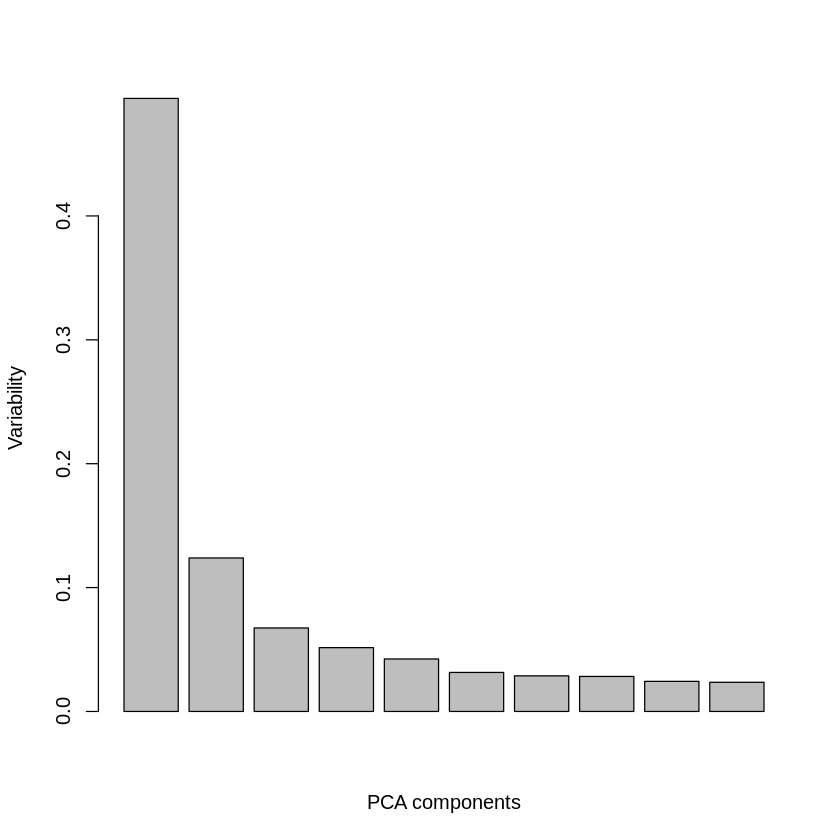

In [ ]:
#barplot for first 10 components
barplot(var_explained[1:10], xlab="PCA components", ylab="Variability")

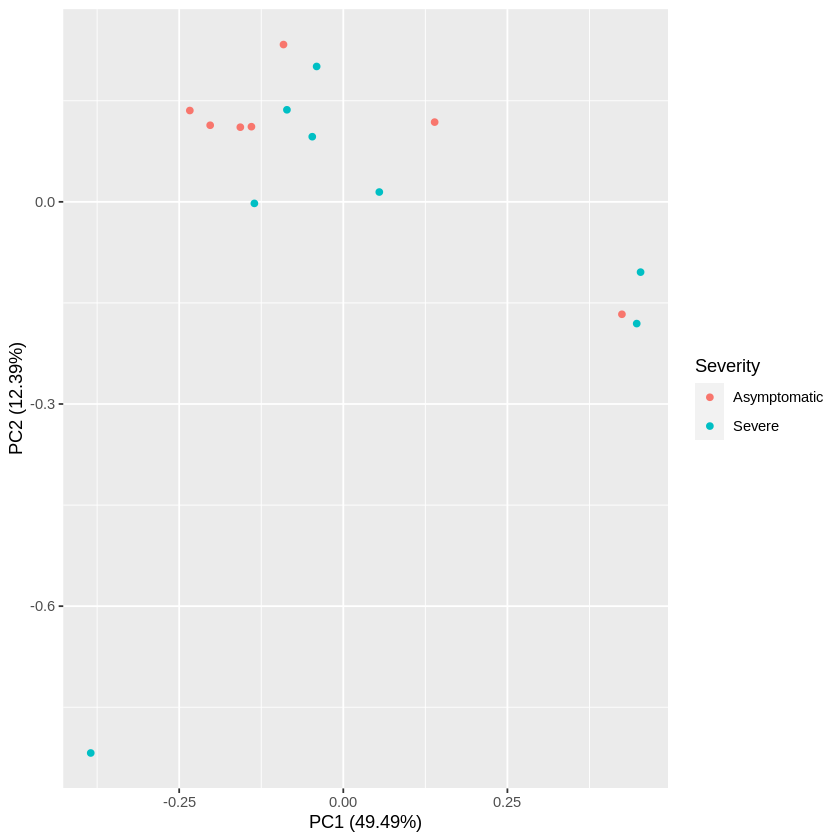

In [ ]:
#scatter plot
autoplot(pca_res, data=OBJECT, colour="Severity")

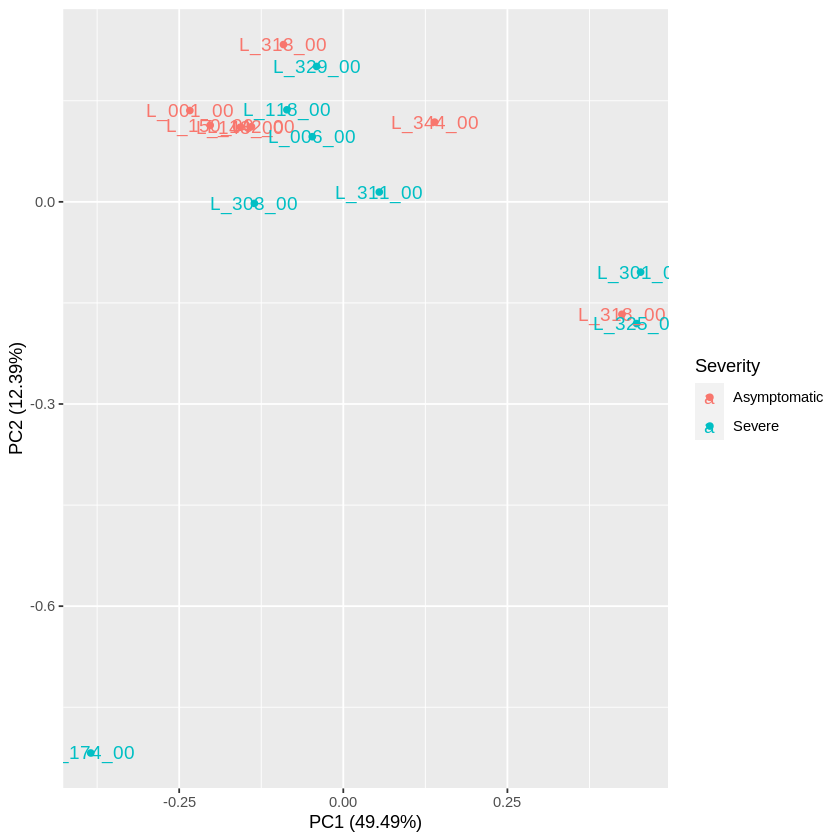

In [ ]:
#locate sampleS
autoplot(pca_res, data=OBJECT, colour="Severity", label=TRUE, label.size = 4)

In [ ]:
which(rownames(OBJECT) %in% c("L_318_00", "L_174_00", "L_344_00", "L_313_00"))

[1]  5  6  7 10

In [ ]:
which(rownames(OBJECT) %in% c("L_318_00", "L_174_00", "L_344_00", "L_313_00", "L_301_00", "L_325_00", "L_303_00"))

[1]  5  6  7 10 11 12 14

In [ ]:
#drop row with row index in OBJECT and create new object with outliers removed. 
OBJECT2 <- OBJECT[-c(5,6,7,10),]

In [ ]:
#drop row with row index in OBJECT and create new object with outliers removed. 
OBJECT3 <- OBJECT[-c(5,6,7,10,11,12,14),]

In [ ]:
dim(OBJECT)
dim(OBJECT2)

[1]    15 35588

[1]    11 35588

In [ ]:
dim(OBJECT3)

[1]     8 35588

In [ ]:
df2 <- OBJECT2[2:ncol(OBJECT2)]

In [ ]:
df3 <- OBJECT3[2:ncol(OBJECT3)]

In [ ]:
dim(df2)

[1]    11 35587

In [ ]:
dim(df3)

[1]     8 35587

In [ ]:
pca_res21 <- prcomp(df2)

In [ ]:
pca_res21_3 <- prcomp(df3)

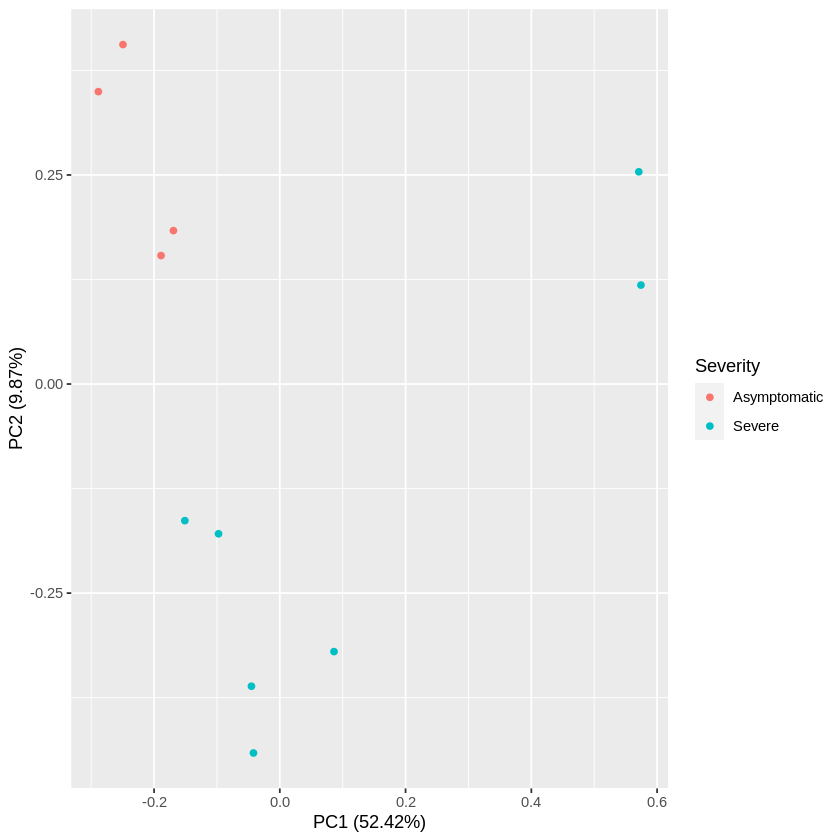

In [ ]:
autoplot(pca_res21, data=OBJECT2, colour="Severity")

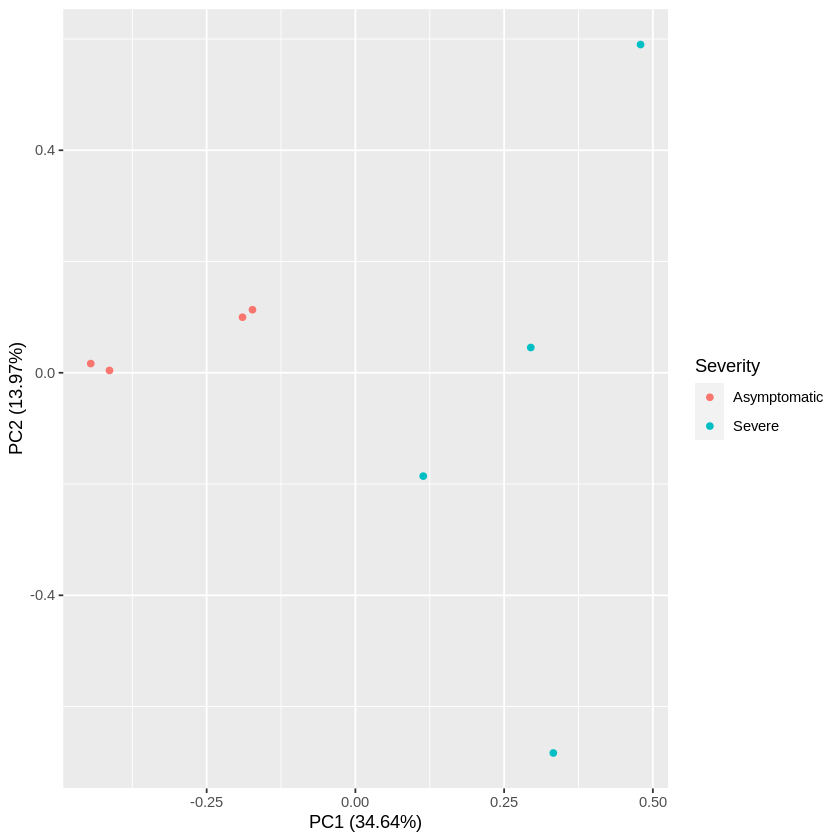

In [ ]:
autoplot(pca_res21_3, data=OBJECT3, colour="Severity")

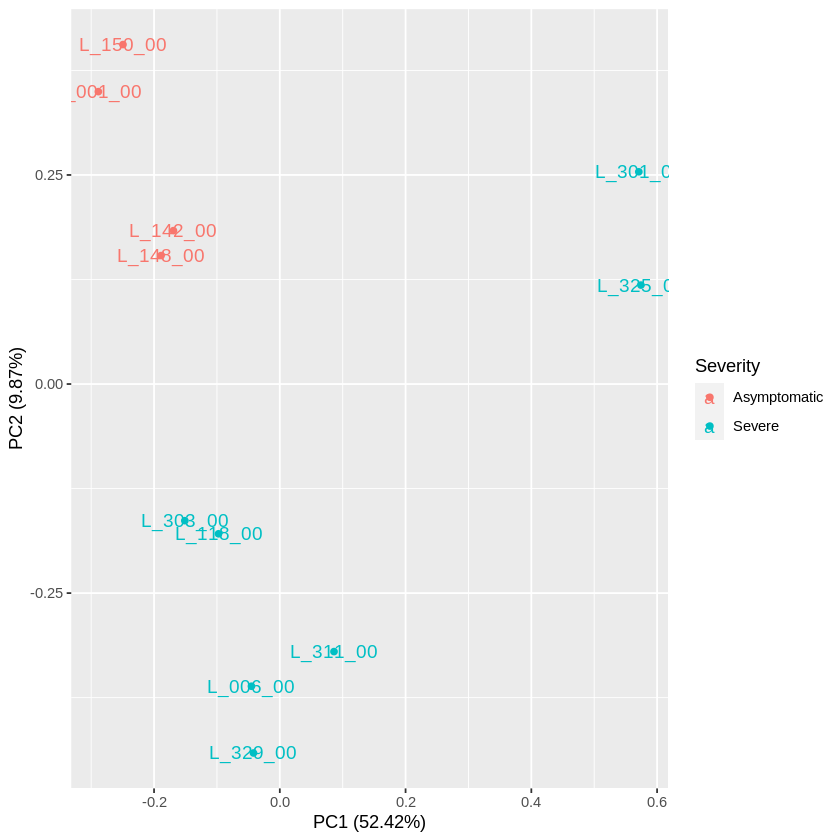

In [ ]:
autoplot(pca_res21, data=OBJECT2, colour="Severity", label=TRUE, label.size = 4)

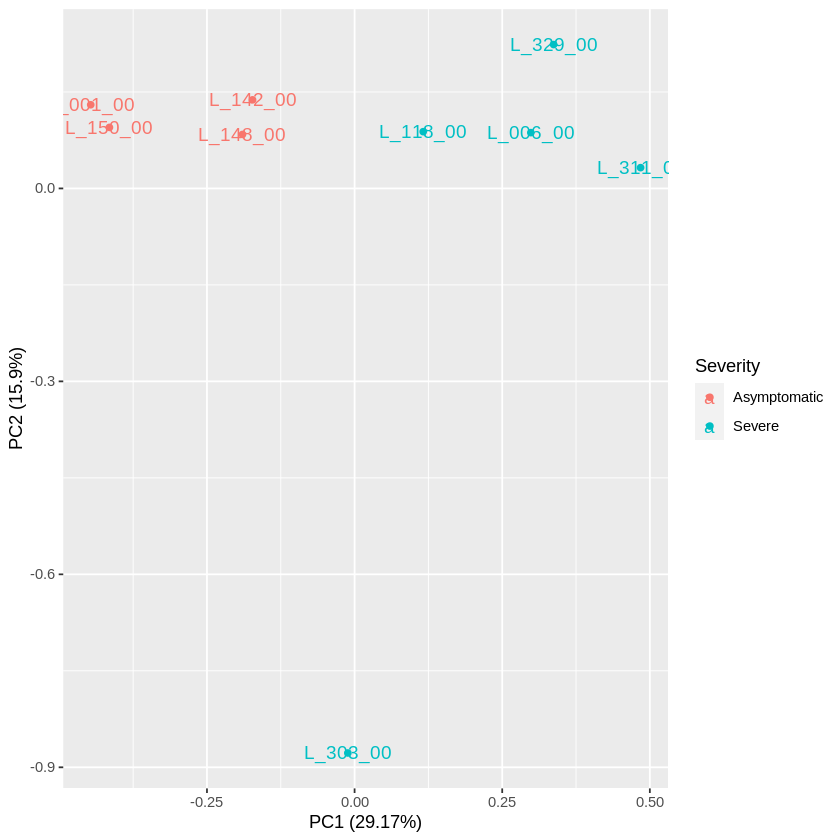

In [ ]:
autoplot(pca_res21_3, data=OBJECT3, colour="Severity",  label=TRUE, label.size = 4)